### ASSIGNMENT 1 - Artificial Neural Networks 

### Regression using ANN - Hotel Booking Demand Dataset

- Dataset Link : https://drive.google.com/drive/folders/158-cgDiMkBuPLmt7jhwn7fyOfusa1X_V?usp=share_link

- What Kind Of Approach You Could Follow for your Problem Statements :

- Reading the Data, Understanding the Data, Exploratory Data Analysis, Splitting the Data, Training and Testing, Modeling, Accuracy

- Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.


### Assignment Submitted by VINAY M on 17-09-2023

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Data Dictionary Available at
# https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0010

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
# Dropping Columns with Maximum Null values
df.drop(['agent','company'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [9]:
#Dropping Null rows
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [12]:
# Type casting reservation_status_date to Date Time Format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

In [13]:
# Listing all numerical columns
num_cols = []
for col in df.select_dtypes(include=[int, float]).columns:
    num_cols.append(col)
num_cols

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [14]:
# Listing all categorical columns
cat_cols = []
for col in df.select_dtypes(include=[object]).columns:
    cat_cols.append(col)
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [15]:
# Checking the Cardinality
# checking cardinality of categorical columns
categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns:
    unique_values = df[column].unique()
    cardinality = len(unique_values)
    print(f"{column}:::::: {cardinality} Categories \n{unique_values} \n\n")

hotel:::::: 2 Categories 
['Resort Hotel' 'City Hotel'] 


arrival_date_month:::::: 12 Categories 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 


meal:::::: 5 Categories 
['BB' 'FB' 'HB' 'SC' 'Undefined'] 


country:::::: 177 Categories 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 

In [16]:
# Remapping Categories with Equivalent Values
df['meal'] = df['meal'].map({'BB' : 'Bed and Breakfast', 'FB': 'Full board', 'HB': 'Full board', 'SC': 'Self Catering', 'Undefined': 'Not Preferred'})

In [17]:
# Checking the Cardinality
# checking cardinality of categorical columns
categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns:
    unique_values = df[column].unique()
    cardinality = len(unique_values)
    print(f"{column}:::::: {cardinality} Categories \n{unique_values} \n\n")

hotel:::::: 2 Categories 
['Resort Hotel' 'City Hotel'] 


arrival_date_month:::::: 12 Categories 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 


meal:::::: 4 Categories 
['Bed and Breakfast' 'Full board' 'Self Catering' 'Not Preferred'] 


country:::::: 177 Categories 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VN

In [18]:
abbreviations = list(df['country'].unique())

In [19]:
abbreviations

['PRT',
 'GBR',
 'USA',
 'ESP',
 'IRL',
 'FRA',
 'ROU',
 'NOR',
 'OMN',
 'ARG',
 'POL',
 'DEU',
 'BEL',
 'CHE',
 'CN',
 'GRC',
 'ITA',
 'NLD',
 'DNK',
 'RUS',
 'SWE',
 'AUS',
 'EST',
 'CZE',
 'BRA',
 'FIN',
 'MOZ',
 'BWA',
 'LUX',
 'SVN',
 'ALB',
 'IND',
 'CHN',
 'MEX',
 'MAR',
 'UKR',
 'SMR',
 'LVA',
 'PRI',
 'SRB',
 'CHL',
 'AUT',
 'BLR',
 'LTU',
 'TUR',
 'ZAF',
 'AGO',
 'ISR',
 'CYM',
 'ZMB',
 'CPV',
 'ZWE',
 'DZA',
 'KOR',
 'CRI',
 'HUN',
 'ARE',
 'TUN',
 'JAM',
 'HRV',
 'HKG',
 'IRN',
 'GEO',
 'AND',
 'GIB',
 'URY',
 'JEY',
 'CAF',
 'CYP',
 'COL',
 'GGY',
 'KWT',
 'NGA',
 'MDV',
 'VEN',
 'SVK',
 'FJI',
 'KAZ',
 'PAK',
 'IDN',
 'LBN',
 'PHL',
 'SEN',
 'SYC',
 'AZE',
 'BHR',
 'NZL',
 'THA',
 'DOM',
 'MKD',
 'MYS',
 'ARM',
 'JPN',
 'LKA',
 'CUB',
 'CMR',
 'BIH',
 'MUS',
 'COM',
 'SUR',
 'UGA',
 'BGR',
 'CIV',
 'JOR',
 'SYR',
 'SGP',
 'BDI',
 'SAU',
 'VNM',
 'PLW',
 'QAT',
 'EGY',
 'PER',
 'MLT',
 'MWI',
 'ECU',
 'MDG',
 'ISL',
 'UZB',
 'NPL',
 'BHS',
 'MAC',
 'TGO',
 'TWN',
 'DJI',
 

In [20]:
import pycountry

In [21]:
country_code_dict = {}

for abbreviation in abbreviations:
    country = pycountry.countries.get(alpha_3=abbreviation)
    if country:
        country_code_dict[abbreviation] = country.name
    else:
        country_code_dict[abbreviation] = 'Unknown'

# Print the resulting dictionary
for abbreviation, country_name in country_code_dict.items():
    print(f"{abbreviation}: {country_name}")

PRT: Portugal
GBR: United Kingdom
USA: United States
ESP: Spain
IRL: Ireland
FRA: France
ROU: Romania
NOR: Norway
OMN: Oman
ARG: Argentina
POL: Poland
DEU: Germany
BEL: Belgium
CHE: Switzerland
CN: Unknown
GRC: Greece
ITA: Italy
NLD: Netherlands
DNK: Denmark
RUS: Russian Federation
SWE: Sweden
AUS: Australia
EST: Estonia
CZE: Czechia
BRA: Brazil
FIN: Finland
MOZ: Mozambique
BWA: Botswana
LUX: Luxembourg
SVN: Slovenia
ALB: Albania
IND: India
CHN: China
MEX: Mexico
MAR: Morocco
UKR: Ukraine
SMR: San Marino
LVA: Latvia
PRI: Puerto Rico
SRB: Serbia
CHL: Chile
AUT: Austria
BLR: Belarus
LTU: Lithuania
TUR: Turkey
ZAF: South Africa
AGO: Angola
ISR: Israel
CYM: Cayman Islands
ZMB: Zambia
CPV: Cabo Verde
ZWE: Zimbabwe
DZA: Algeria
KOR: Korea, Republic of
CRI: Costa Rica
HUN: Hungary
ARE: United Arab Emirates
TUN: Tunisia
JAM: Jamaica
HRV: Croatia
HKG: Hong Kong
IRN: Iran, Islamic Republic of
GEO: Georgia
AND: Andorra
GIB: Gibraltar
URY: Uruguay
JEY: Jersey
CAF: Central African Republic
CYP: Cyp

In [22]:
# Changing last name, first name format to First name, last name in dictionary keys
country_dict = {}

for key, value in country_code_dict.items():
    if "," in value:
        lastname, firstname = value.split(', ')
        new_value = f"{firstname} {lastname}"
        country_dict[key] = new_value
    else:
        country_dict[key] = value

country_dict['CN'] = "China"
country_dict

{'PRT': 'Portugal',
 'GBR': 'United Kingdom',
 'USA': 'United States',
 'ESP': 'Spain',
 'IRL': 'Ireland',
 'FRA': 'France',
 'ROU': 'Romania',
 'NOR': 'Norway',
 'OMN': 'Oman',
 'ARG': 'Argentina',
 'POL': 'Poland',
 'DEU': 'Germany',
 'BEL': 'Belgium',
 'CHE': 'Switzerland',
 'CN': 'China',
 'GRC': 'Greece',
 'ITA': 'Italy',
 'NLD': 'Netherlands',
 'DNK': 'Denmark',
 'RUS': 'Russian Federation',
 'SWE': 'Sweden',
 'AUS': 'Australia',
 'EST': 'Estonia',
 'CZE': 'Czechia',
 'BRA': 'Brazil',
 'FIN': 'Finland',
 'MOZ': 'Mozambique',
 'BWA': 'Botswana',
 'LUX': 'Luxembourg',
 'SVN': 'Slovenia',
 'ALB': 'Albania',
 'IND': 'India',
 'CHN': 'China',
 'MEX': 'Mexico',
 'MAR': 'Morocco',
 'UKR': 'Ukraine',
 'SMR': 'San Marino',
 'LVA': 'Latvia',
 'PRI': 'Puerto Rico',
 'SRB': 'Serbia',
 'CHL': 'Chile',
 'AUT': 'Austria',
 'BLR': 'Belarus',
 'LTU': 'Lithuania',
 'TUR': 'Turkey',
 'ZAF': 'South Africa',
 'AGO': 'Angola',
 'ISR': 'Israel',
 'CYM': 'Cayman Islands',
 'ZMB': 'Zambia',
 'CPV': 'Cabo

In [23]:
# Remapping Country code with Equivalent Country name
df['country'] = df['country'].map(country_dict)

In [24]:
# Re- Checking the Cardinality
# checking cardinality of categorical columns
categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns:
    unique_values = df[column].unique()
    cardinality = len(unique_values)
    print(f"{column}:::::: {cardinality} Categories \n{unique_values} \n\n")

hotel:::::: 2 Categories 
['Resort Hotel' 'City Hotel'] 


arrival_date_month:::::: 12 Categories 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 


meal:::::: 4 Categories 
['Bed and Breakfast' 'Full board' 'Self Catering' 'Not Preferred'] 


country:::::: 176 Categories 
['Portugal' 'United Kingdom' 'United States' 'Spain' 'Ireland' 'France'
 'Romania' 'Norway' 'Oman' 'Argentina' 'Poland' 'Germany' 'Belgium'
 'Switzerland' 'China' 'Greece' 'Italy' 'Netherlands' 'Denmark'
 'Russian Federation' 'Sweden' 'Australia' 'Estonia' 'Czechia' 'Brazil'
 'Finland' 'Mozambique' 'Botswana' 'Luxembourg' 'Slovenia' 'Albania'
 'India' 'Mexico' 'Morocco' 'Ukraine' 'San Marino' 'Latvia' 'Puerto Rico'
 'Serbia' 'Chile' 'Austria' 'Belarus' 'Lithuania' 'Turkey' 'South Africa'
 'Angola' 'Israel' 'Cayman Islands' 'Zambia' 'Cabo Verde' 'Zimbabwe'
 'Algeria' 'Republic of Korea' 'Costa Rica' 'Hungary'
 'United Arab Emirates' 'Tunisia' 'Jamaica' 

In [25]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118898.0,0.371352,0.483168,0.00,0.0,0.0,1.0,1.0
lead_time,118898.0,104.311435,106.903309,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118898.0,2016.157656,0.707459,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118898.0,27.166555,13.589971,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118898.0,15.800880,8.780324,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118898.0,0.928897,0.996216,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118898.0,2.502145,1.900168,0.00,1.0,2.0,3.0,41.0
adults,118898.0,1.858391,0.578576,0.00,2.0,2.0,2.0,55.0
children,118898.0,0.104207,0.399172,0.00,0.0,0.0,0.0,10.0
babies,118898.0,0.007948,0.097380,0.00,0.0,0.0,0.0,10.0


In [27]:
# Duplicates
print(df.duplicated().sum())

31984


In [28]:
df.shape

(118898, 30)

In [29]:
df.drop_duplicates(keep='last', inplace = True)

In [30]:
print(df.duplicated().sum())

0


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86914.0,0.275939,0.446989,0.00,0.00,0.00,1.0,1.0
lead_time,86914.0,80.202741,86.102902,0.00,12.00,50.00,125.0,737.0
arrival_date_year,86914.0,2016.211842,0.685989,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,86914.0,26.841694,13.654113,1.00,16.00,27.00,37.0,53.0
arrival_date_day_of_month,86914.0,15.818453,8.834539,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,86914.0,1.007548,1.028821,0.00,0.00,1.00,2.0,16.0
stays_in_week_nights,86914.0,2.628955,2.043860,0.00,1.00,2.00,4.0,41.0
adults,86914.0,1.878604,0.625881,0.00,2.00,2.00,2.0,55.0
children,86914.0,0.139253,0.456848,0.00,0.00,0.00,0.0,10.0
babies,86914.0,0.010815,0.113510,0.00,0.00,0.00,0.0,10.0


In [32]:
# Adr having Negative values
# Requires capping
adr_median = df['adr'].median()

In [33]:
adr_median

98.41

In [34]:
df.loc[df['adr'] < 0, 'adr'] = adr_median

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86914.0,0.275939,0.446989,0.0,0.00,0.00,1.0,1.0
lead_time,86914.0,80.202741,86.102902,0.0,12.00,50.00,125.0,737.0
arrival_date_year,86914.0,2016.211842,0.685989,2015.0,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,86914.0,26.841694,13.654113,1.0,16.00,27.00,37.0,53.0
arrival_date_day_of_month,86914.0,15.818453,8.834539,1.0,8.00,16.00,23.0,31.0
stays_in_weekend_nights,86914.0,1.007548,1.028821,0.0,0.00,1.00,2.0,16.0
stays_in_week_nights,86914.0,2.628955,2.043860,0.0,1.00,2.00,4.0,41.0
adults,86914.0,1.878604,0.625881,0.0,2.00,2.00,2.0,55.0
children,86914.0,0.139253,0.456848,0.0,0.00,0.00,0.0,10.0
babies,86914.0,0.010815,0.113510,0.0,0.00,0.00,0.0,10.0


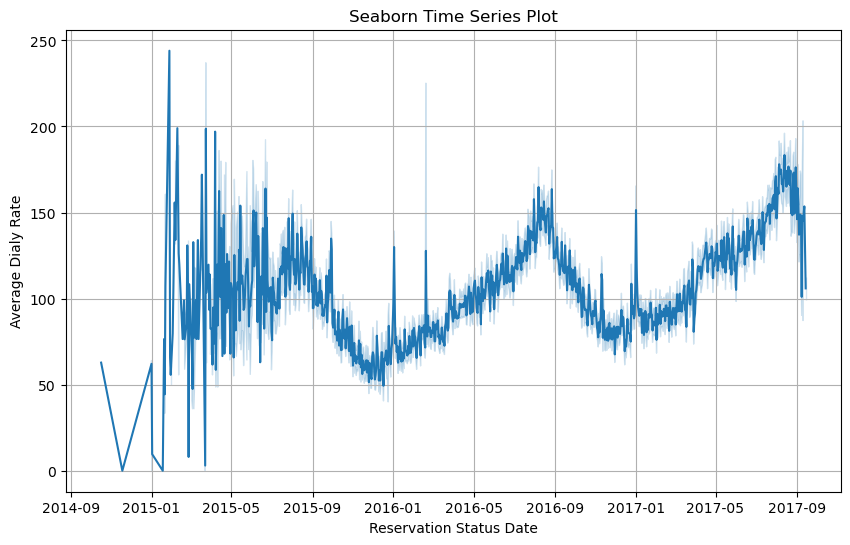

In [36]:
# Visualising Average dialy rate with respect to time
plt.figure(figsize=(10, 6))
sns.lineplot(x='reservation_status_date', y='adr', data=df)
plt.title('Seaborn Time Series Plot')
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Dialy Rate')
plt.grid(True)
plt.show()

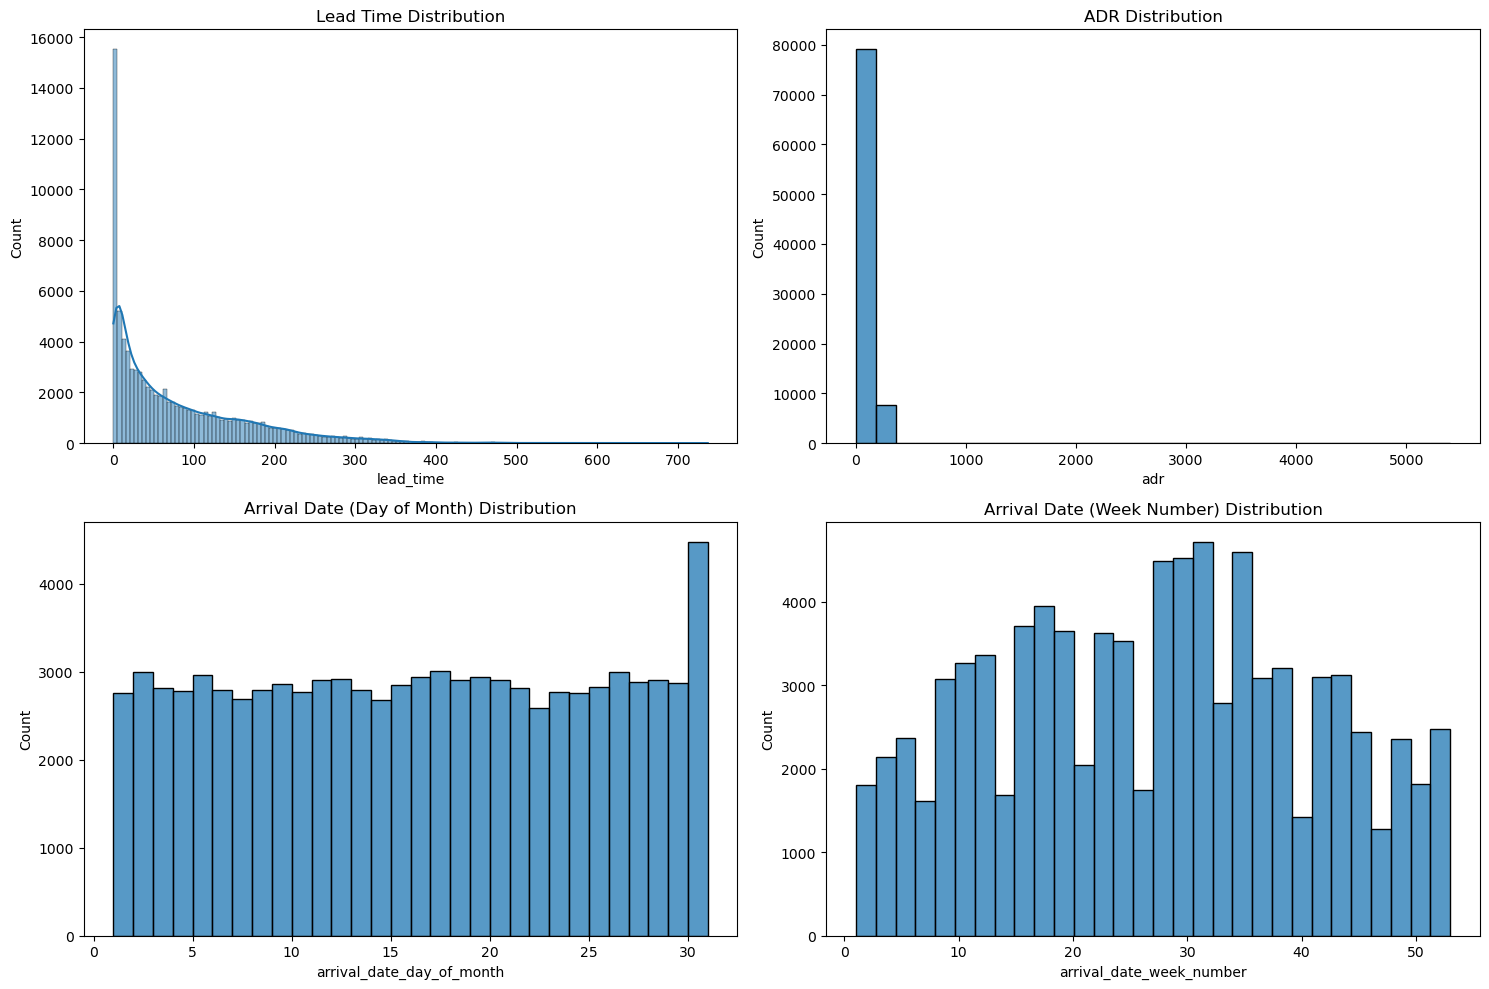

In [37]:
# Plot the distribution of some key numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Lead time
sns.histplot(df['lead_time'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Lead Time Distribution')

# Average Daily Rate
sns.histplot(df['adr'], kde=False, bins=30, ax=axes[0, 1])
axes[0, 1].set_title('ADR Distribution')

# Arrival Date (Day of Month)
sns.histplot(df['arrival_date_day_of_month'], kde=False, bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Arrival Date (Day of Month) Distribution')

# Arrival Date (Week Number)
sns.histplot(df['arrival_date_week_number'], kde=False, bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Arrival Date (Week Number) Distribution')

plt.tight_layout()
plt.show()

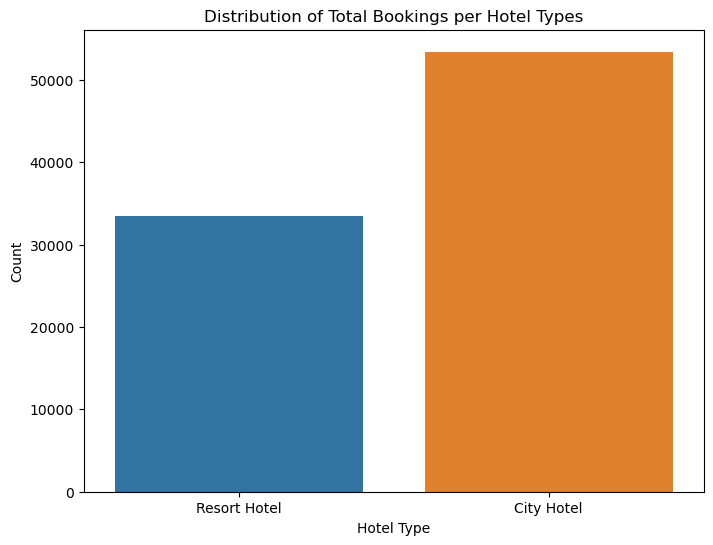

In [38]:
# Plot distribution of hotel types
plt.figure(figsize=(8,6))
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Total Bookings per Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

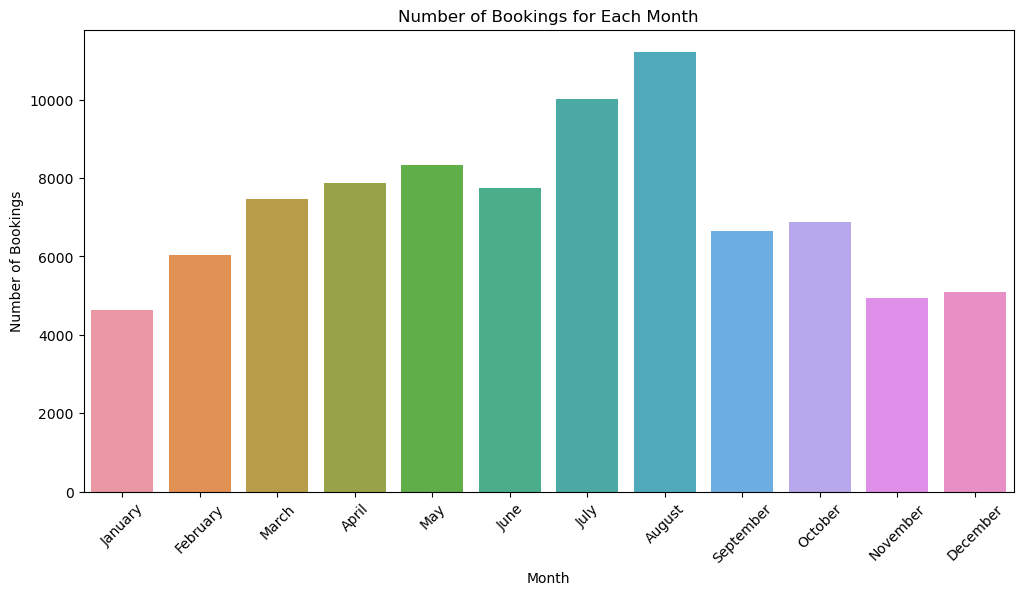

In [39]:
# Order of the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the number of bookings for each month
plt.figure(figsize=(12,6))
sns.countplot(x='arrival_date_month', data=df, order=months_order)
plt.title('Number of Bookings for Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

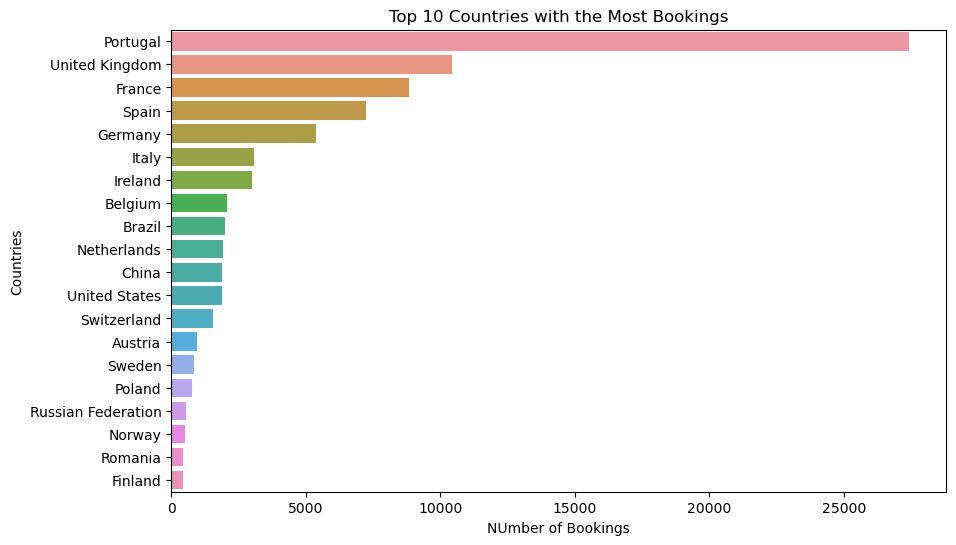

In [40]:
# Top 20 countries with the most bookings
top20 = df['country'].value_counts().head(20)

# Plot the top 20 countries
plt.figure(figsize=(10,6))
sns.barplot(x=top20.values, y=top20.index, orient='h')
plt.title('Top 10 Countries with the Most Bookings')
plt.xlabel('NUmber of Bookings')
plt.ylabel('Countries')
plt.show()

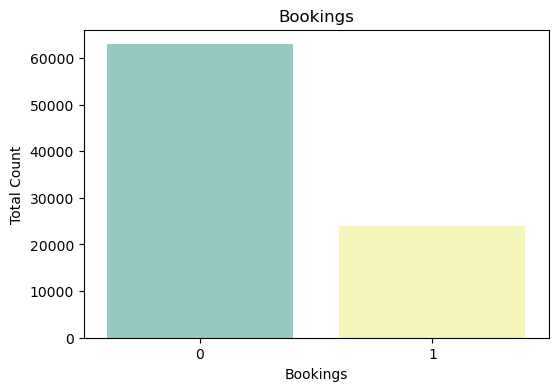

In [41]:
# Rate of Cancellation
plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=df, palette='Set3')
plt.title('Bookings')
plt.xlabel('Bookings')
plt.ylabel('Total Count')
plt.show()

In [42]:
booking_status = df.groupby('is_canceled')['is_canceled'].count()
booking_status

is_canceled
0    62931
1    23983
Name: is_canceled, dtype: int64

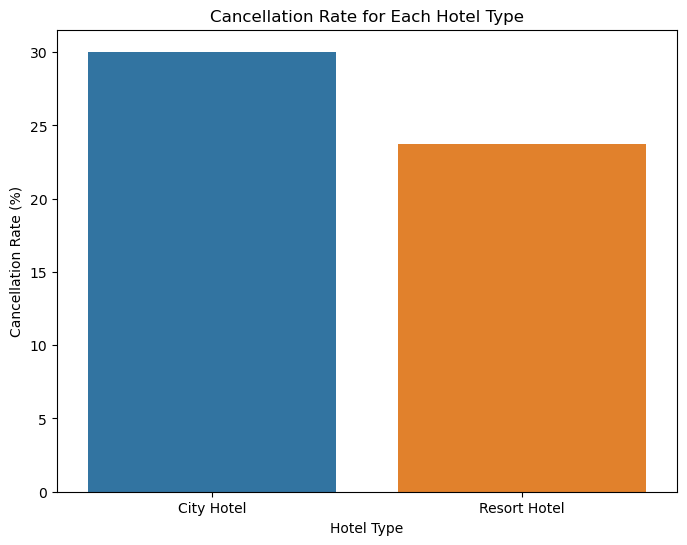

In [43]:
# Calculate cancellation rate for each hotel type
cancellation_rates = df.groupby('hotel')['is_canceled'].mean()

# Convert to percentage and plot
cancellation_rates = cancellation_rates * 100

# Plot cancellation rates
plt.figure(figsize=(8,6))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values)
plt.title('Cancellation Rate for Each Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()

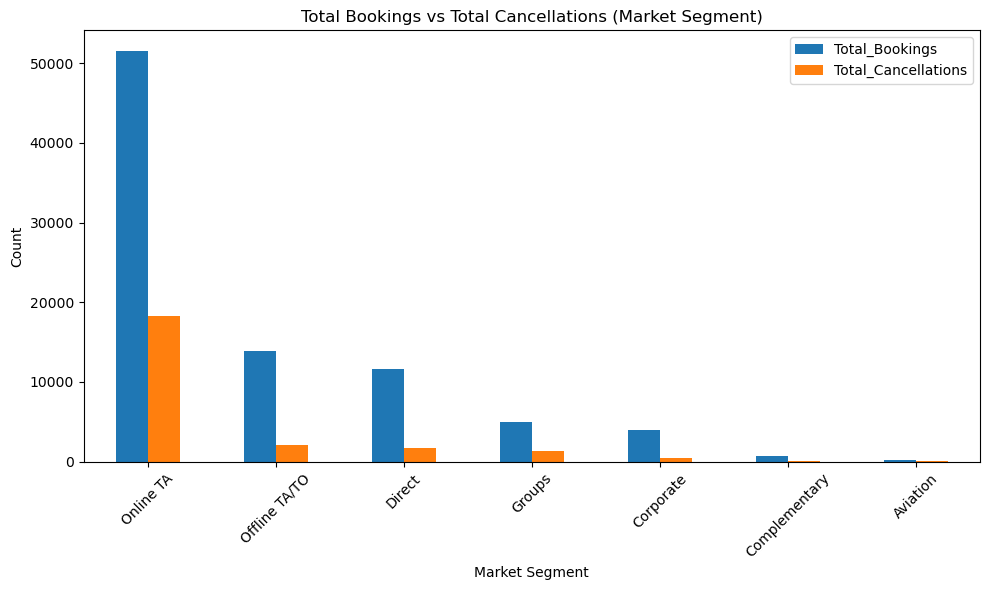

In [44]:
# Calculate the total number of bookings and cancellations for each market segment
market_segment_bookings = df['market_segment'].value_counts()
market_segment_cancellations = df[df['is_canceled'] == 1]['market_segment'].value_counts()

# Create a new DataFrame for plotting
market_segment_df = pd.DataFrame({
    'Total_Bookings': market_segment_bookings,
    'Total_Cancellations': market_segment_cancellations
}).sort_values(by='Total_Bookings', ascending=False)

# Plot the total number of bookings vs total cancellations
ax = market_segment_df.plot(kind='bar', figsize=(10, 6))
ax.set_title('Total Bookings vs Total Cancellations (Market Segment)')
ax.set_xlabel('Market Segment')
ax.set_ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

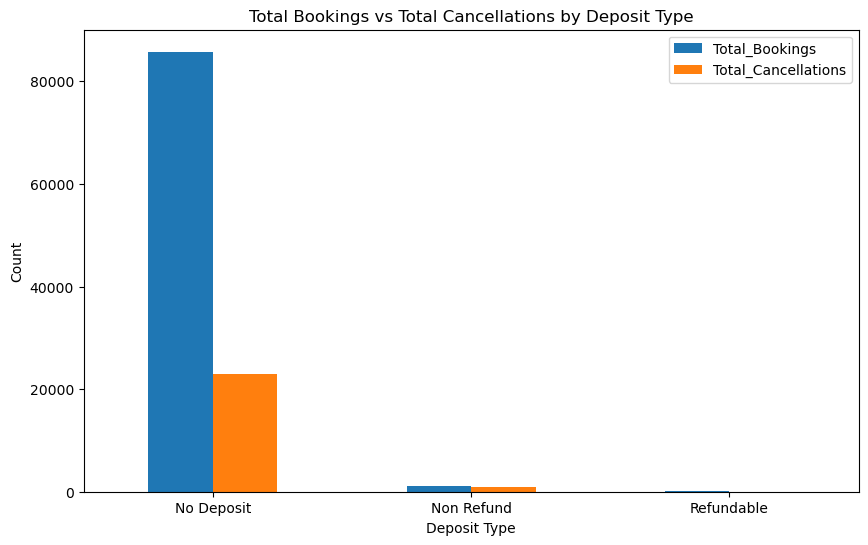

In [45]:
# Calculate total bookings for each deposit type
deposit_total_bookings = df['deposit_type'].value_counts()

# Calculate total cancellations for each deposit type
deposit_total_cancellations = df[df['is_canceled'] == 1]['deposit_type'].value_counts()

# Combine total bookings and total cancellations into one dataframe
deposit_data = pd.DataFrame({'Total_Bookings': deposit_total_bookings, 
                             'Total_Cancellations': deposit_total_cancellations})

# Calculate cancellation percent for each deposit type
deposit_data['Cancellation_Percent'] = (deposit_data['Total_Cancellations'] / deposit_data['Total_Bookings']) * 100

# Plot total bookings and total cancellations for each deposit type in one chart
deposit_data[['Total_Bookings', 'Total_Cancellations']].plot(kind='bar', figsize=(10, 6))
plt.title('Total Bookings vs Total Cancellations by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [46]:
filtered = df['is_canceled'] == 0
data = df[filtered]
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


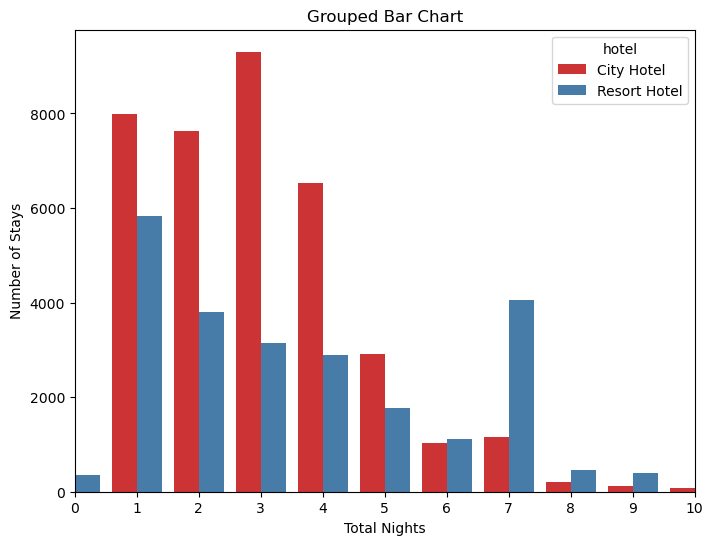

In [47]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
plt.figure(figsize=(8, 6))
sns.barplot(data=stay, x='total_nights', y='Number of stays', hue='hotel', palette='Set1')
#sns.histplot(data=stay, x='total_nights', bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50], kde=True)
plt.title('Grouped Bar Chart')
plt.xlabel('Total Nights')
plt.xlim(0,10)
plt.ylabel('Number of Stays')
plt.show()

In [48]:
# ANN MODELLING

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
dfNew = df.copy(deep=True)

In [81]:
dfNew

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [82]:
categorical_columns = dfNew.select_dtypes(include=['object'])
for column in categorical_columns:
    unique_values = dfNew[column].unique()
    cardinality = len(unique_values)
    print(f"{column}:::::: {cardinality} Categories \n{unique_values} \n\n")

hotel:::::: 2 Categories 
['Resort Hotel' 'City Hotel'] 


arrival_date_month:::::: 12 Categories 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 


meal:::::: 4 Categories 
['Bed and Breakfast' 'Full board' 'Self Catering' 'Not Preferred'] 


country:::::: 176 Categories 
['Portugal' 'United Kingdom' 'United States' 'Spain' 'Ireland' 'France'
 'Romania' 'Norway' 'Oman' 'Argentina' 'Poland' 'Germany' 'Belgium'
 'Switzerland' 'China' 'Greece' 'Italy' 'Netherlands' 'Denmark'
 'Russian Federation' 'Sweden' 'Australia' 'Estonia' 'Czechia' 'Brazil'
 'Finland' 'Mozambique' 'Botswana' 'Luxembourg' 'Slovenia' 'Albania'
 'India' 'Mexico' 'Morocco' 'Ukraine' 'San Marino' 'Latvia' 'Puerto Rico'
 'Serbia' 'Chile' 'Austria' 'Belarus' 'Lithuania' 'Turkey' 'South Africa'
 'Angola' 'Israel' 'Cayman Islands' 'Zambia' 'Cabo Verde' 'Zimbabwe'
 'Algeria' 'Republic of Korea' 'Costa Rica' 'Hungary'
 'United Arab Emirates' 'Tunisia' 'Jamaica' 

In [83]:
#Remapping Months, as label encoders code in ascending which makes confusion while interpreting

In [84]:
months_dict = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

In [85]:
dfNew['arrival_date_month'] = dfNew['arrival_date_month'].map(months_dict)

In [86]:
dfNew

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [87]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86914 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86914 non-null  object        
 1   is_canceled                     86914 non-null  int64         
 2   lead_time                       86914 non-null  int64         
 3   arrival_date_year               86914 non-null  int64         
 4   arrival_date_month              86914 non-null  int64         
 5   arrival_date_week_number        86914 non-null  int64         
 6   arrival_date_day_of_month       86914 non-null  int64         
 7   stays_in_weekend_nights         86914 non-null  int64         
 8   stays_in_week_nights            86914 non-null  int64         
 9   adults                          86914 non-null  int64         
 10  children                        86914 non-null  float64       
 11  b

In [88]:
#dropping columns for ML Modelling
colsdrop = ['lead_time',
'arrival_date_year',
'reservation_status',
'reservation_status_date',
'required_car_parking_spaces',
'total_of_special_requests',
'adr']
colsdrop

['lead_time',
 'arrival_date_year',
 'reservation_status',
 'reservation_status_date',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'adr']

In [89]:
dfNew.drop(colsdrop, axis=1, inplace=True)
dfNew

,hotel,is_canceled,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type
0,Resort Hotel,0,7,27,1,0,0,2,0.0,0,...,Direct,0,0,0,C,C,3,No Deposit,0,Transient
1,Resort Hotel,0,7,27,1,0,0,2,0.0,0,...,Direct,0,0,0,C,C,4,No Deposit,0,Transient
2,Resort Hotel,0,7,27,1,0,1,1,0.0,0,...,Direct,0,0,0,A,C,0,No Deposit,0,Transient
3,Resort Hotel,0,7,27,1,0,1,1,0.0,0,...,Corporate,0,0,0,A,A,0,No Deposit,0,Transient
5,Resort Hotel,0,7,27,1,0,2,2,0.0,0,...,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,8,35,30,2,5,2,0.0,0,...,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient
119386,City Hotel,0,8,35,31,2,5,3,0.0,0,...,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient
119387,City Hotel,0,8,35,31,2,5,2,0.0,0,...,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient
119388,City Hotel,0,8,35,31,2,5,2,0.0,0,...,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient


In [90]:
X = dfNew.drop(["is_canceled"], axis=1)
y = dfNew["is_canceled"]

In [61]:
# Transforming X

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86914 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86914 non-null  int32  
 1   arrival_date_month              86914 non-null  int64  
 2   arrival_date_week_number        86914 non-null  int64  
 3   arrival_date_day_of_month       86914 non-null  int64  
 4   stays_in_weekend_nights         86914 non-null  int64  
 5   stays_in_week_nights            86914 non-null  int64  
 6   adults                          86914 non-null  int64  
 7   children                        86914 non-null  float64
 8   babies                          86914 non-null  int64  
 9   meal                            86914 non-null  object 
 10  country                         86914 non-null  object 
 11  market_segment                  86914 non-null  object 
 12  distribution_channel           

In [102]:
# Creating Pipeline to Label encode and Standardise
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [105]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Loop through columns and apply transformations
for column in X.columns:
    if X[column].dtype == 'object':
        # Apply Label Encoding to categorical columns
        X[column] = label_encoder.fit_transform(X[column])
    else:
        # Apply Standard Scaling to numerical columns
        X[column] = scaler.fit_transform(X[[column]])

In [106]:
X

,hotel,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type
0,1.262408,0.169243,0.011594,-1.677341,-0.979328,-1.286277,0.193961,-0.304813,-0.095281,0,...,1,-0.202111,-0.081804,-0.10288,2,2,3.746484,0,-0.075048,2
1,1.262408,0.169243,0.011594,-1.677341,-0.979328,-1.286277,0.193961,-0.304813,-0.095281,0,...,1,-0.202111,-0.081804,-0.10288,2,2,5.119784,0,-0.075048,2
2,1.262408,0.169243,0.011594,-1.677341,-0.979328,-0.797004,-1.403796,-0.304813,-0.095281,0,...,1,-0.202111,-0.081804,-0.10288,0,2,-0.373418,0,-0.075048,2
3,1.262408,0.169243,0.011594,-1.677341,-0.979328,-0.797004,-1.403796,-0.304813,-0.095281,0,...,0,-0.202111,-0.081804,-0.10288,0,0,-0.373418,0,-0.075048,2
5,1.262408,0.169243,0.011594,-1.677341,-0.979328,-0.307731,0.193961,-0.304813,-0.095281,0,...,3,-0.202111,-0.081804,-0.10288,0,0,-0.373418,0,-0.075048,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.792137,0.492581,0.597502,1.605248,0.964656,1.160089,0.193961,-0.304813,-0.095281,0,...,3,-0.202111,-0.081804,-0.10288,0,0,-0.373418,0,-0.075048,2
119386,-0.792137,0.492581,0.597502,1.718441,0.964656,1.160089,1.791719,-0.304813,-0.095281,0,...,3,-0.202111,-0.081804,-0.10288,4,4,-0.373418,0,-0.075048,2
119387,-0.792137,0.492581,0.597502,1.718441,0.964656,1.160089,0.193961,-0.304813,-0.095281,0,...,3,-0.202111,-0.081804,-0.10288,3,3,-0.373418,0,-0.075048,2
119388,-0.792137,0.492581,0.597502,1.718441,0.964656,1.160089,0.193961,-0.304813,-0.095281,0,...,3,-0.202111,-0.081804,-0.10288,0,0,-0.373418,0,-0.075048,2


In [108]:
y

0         0
1         0
2         0
3         0
5         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 86914, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [110]:
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [118]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (22, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [119]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               2300      
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 12,501
Trainable params: 12,501
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
1902/1902 [==============================] - 9s 4ms/step - loss: 0.5819 - accuracy: 0.7153 - val_loss: 0.5213 - val_accuracy: 0.7417
Epoch 2/100
1902/1902 [==============================] - 7s 4ms/step - loss: 0.5342 - accuracy: 0.7315 - val_loss: 0.5204 - val_accuracy: 0.7482
Epoch 3/100
1902/1902 [==============================] - 7s 4ms/step - loss: 0.5167 - accuracy: 0.7391 - val_loss: 0.5195 - val_accuracy: 0.7350
Epoch 4/100
1902/1902 [==============================] - 7s 4ms/step - loss: 0.5110 - accuracy: 0.7426 - val_loss: 0.5082 - val_accuracy: 0.7424
Epoch 5/100
1902/1902 [==============================] - 8s 4ms/step - loss: 0.5026 - accuracy: 0.7460 - val_loss: 0.5099 - val_accuracy: 0.7333
Epoch 6/100
1902/1902 [==============================] - 8s 4ms/step - loss: 0.4972 - accuracy: 0.7475 - val_loss: 0.4932 - val_accuracy: 0.7548
Epoch 7/100
1902/1902 [==============================] - 7s 4ms/step - loss: 0.4912 - accuracy: 0.7509 - val_loss: 0.4963 - val_ac

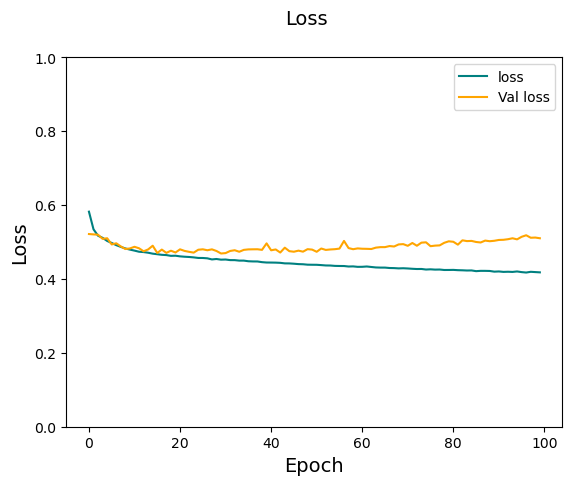

In [124]:
#Plotting the performance - Training Accuracy and Validation Accuracy
fig = plt.figure()
plt.plot(model_history.history['loss'],color='teal',label='loss')
plt.plot(model_history.history['val_loss'],color='orange',label='Val loss')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
fig.suptitle("Loss", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

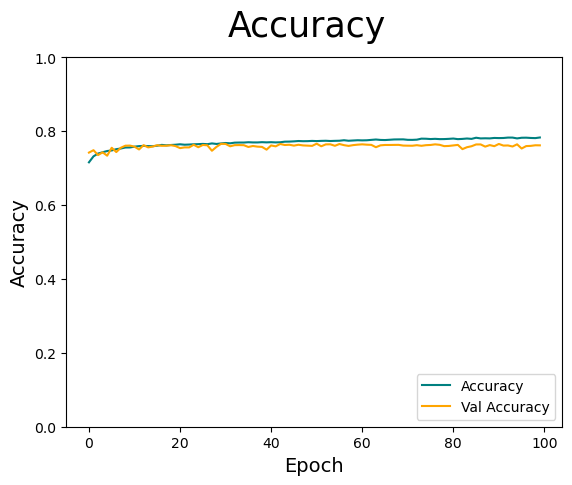

In [125]:
fig = plt.figure()
plt.plot(model_history.history['accuracy'],color='teal',label='Accuracy')
plt.plot(model_history.history['val_accuracy'],color='orange',label='Val Accuracy')
fig.suptitle("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [126]:
#saving model
from tensorflow.keras.models import load_model
model.save('Hotel_Cancellation_Prediction.h5')

In [127]:
# END of ANN

In [128]:
# Assignment Submitted by VINAY M on 17-09-2023